En aquesta pràctica visualitzarem el "fitness landscape" d'un problema i implementarem l'algorisme de gradient descent.

**Important:**
- Etiqueteu els eixos dels gràfics.
- Si utilitzeu nombres aleatoris, recordeu començar el generador en un punt concret determinat per la llavor.
- Comenteu el codi.

**Entrega:**

Abans d'entregar el notebook, recordeu reiniciar el kernel i reexecutar-ho tot. 

Guardeu el notebook clicant `File > Download as > iPython Notebook`.

Anomeneu el fitxer ''`practicalN_surname1_surname2.ipynb`'', on `N` is el número de la pràctica, i `surname1`, `surname2` els primers cognoms dels dos components de la parella.




In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 0. Generació de dades

En aquesta pràctica treballarem amb dades simulades: punts generats a partir d'una recta als quals afegim soroll.

Recordeu l'equació de la recta $y=a x + b$. 

**P0. Genereu les dades.**

1. Definiu els coeficients inicials ($a_0$, $b_0$) escollint valors dins de l'interval [-5,5] ($a_0 \in [-5,5]$, $b_0 \in [-5,5]$).
2. Genereu 10 punts distribuïts equidistantment entre 1 i 10. A cada punt assigneu el valor que defineix la recta. 
3. Afegiu soroll gaussià a cada punt (mitja 0, desviació estàndard 1). Aquestes seran les vostres observacions ($y_i$ en la fórmula del MSE a sota).
4. Visualitzeu les observacions juntament amb la recta inicial.

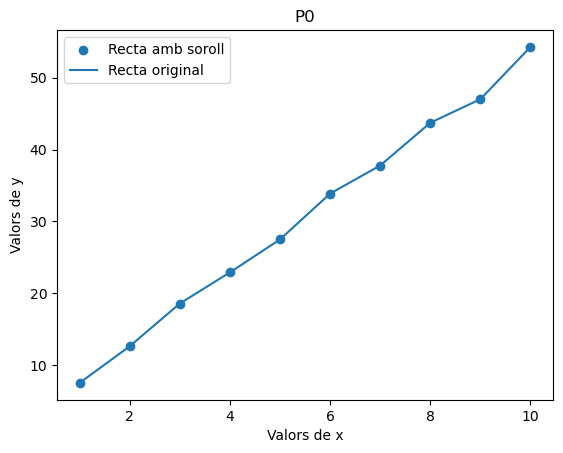

In [8]:
#importem el que necessitem
import numpy as np
import matplotlib.pyplot as plt

# definim coeficients inicials triats per nosaltres
a0 = 5
b0 = 3

# generem punts distribuïts equidistantment
x=np.arange (1,11)
y0=a0*x+b0


#afegim soroll gaussià
soroll = np.random.normal(0,1,10)
yi = y0 + soroll

plt.scatter(x,yi, label='Recta amb soroll') #punts amb soroll gaussià
plt.plot(x,yi, label = 'Recta original') #recta sense soroll
# Li donem nom als eixos i afegim títol al plot
plt.xlabel('Valors de x') 
plt.ylabel('Valors de y')
plt.title('P0')
plt.legend()
plt.show()

# 1. Fitness landscape

Imaginem que desconeixem com han estat generats els punts i volem trobar els valors dels coeficients d'una recta que millor els aproximen mitjançant un algorisme d'optimització. 

En primer lloc, cal triar una funció d'error (cost function). En aquest cas, utilitzarem la funció de cost "mean squared error" (MSE o E):

$E=\frac{1}{n}\Sigma_{i=0}^{n-1}(y_i'-y_i)^2$

on $n$ és el nombre d'observacions, el subindex $i$ denota l'observació $i$, $y_i$ és el valor observat i $y_i'$ és el valor predit.

**P1.** Definiu el codi necessari per calcular el MSE corresponent a un set de paràmetres de coeficients (a,b):

1. Definiu una funció *f_distances* tal que, donats un set de paràmetres (un valor per $a$, un valor per $b$) calculi el vector de diferències entre *y_i'* i *y_i* (cada entrada del vector correspondrà a la diferència per al punt amb index $i$, $i=[0,1,2,\cdots,9]$).
2. Definiu una segona funció *get_error* que faci ús de *f_distances* per calcular el MSE associat a aquell set de paràmetres. 

Ambdues funcions han de prendre com a arguments $a$, $b$, els valors de les coordenades $x$ dels punts i els valors de les observacions (coordenades $y$). 

Nota: Dividir el càlcul en aquestes dues funcions no és estrictament necessari però us ajudarà en apartats posteriors.

In [3]:
import numpy as np

def f_distances (a,b,x,y): #Definim la funció i li entrem 4 paràmetres
    y2 = a*x + b 
    vdif = y2 - y  #Vector diferències

    return vdif

def get_error(a,b,x,y): #Definim la funció i li entrem els paràmetres necesaris
    n = len(x)   #allargada del vector x
    distancias = f_distances(a,b,x,y) #Utilitzem la funció creada en l'exercici P0
    error = (sum(distancias**2))/n #On 'sum' executarà el sumatori de la funció distàncies

    return error
    


**P2**. Escolliu tres parells de valors per $a$ i $b$ entre [-5,5] i calculeu quin error els correspon. Feu un gràfic amb les dades generades en l'apartat 0 com a "scatterplot", i les tres rectes com a "lineplot". Etiqueteu cada recta amb l'error que li correspon a cada una com a llegenda. Comenteu els resultats en 1-2 frases.


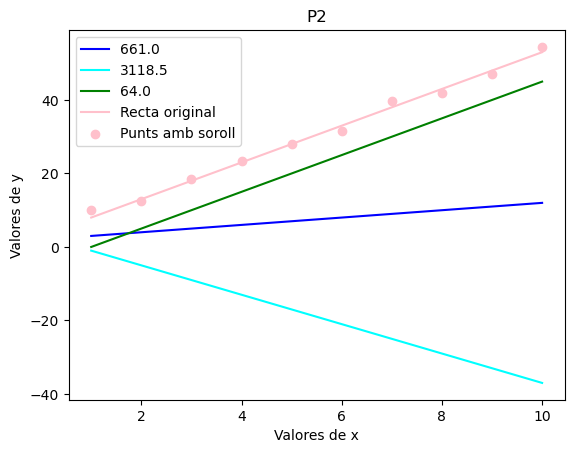

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Definim 3 parells de valors d'a i de b
a_1 = 1
b_1 = 2
y_1 = a_1*x+b_1

a_2 = -4
b_2 = 3
y_2 = a_2*x+b_2

a_3 = 5
b_3 = -5
y_3 = a_3*x+b_3


# Calculem quin error els correspon a cada parell de valors utilitzant la funció definida en el P1
E_1 = get_error(a_1,b_1,x,y0) #Li entrem cada parell de valors d'a i b triats anteriorment a més del vector x i la recta sense soroll
E_2 = get_error(a_2,b_2,x,y0)
E_3 = get_error(a_3,b_3,x,y0)

#Fem el gràfic amb les rectes corresponents
plt.plot(x,y_1,color='b',label=E_1) #recta error 1
plt.plot(x,y_2,color='cyan',label=E_2)  #recta error 2
plt.plot(x,y_3,color='green',label=E_3)  #recta error 3
plt.plot(x,y0, color='pink',label = 'Recta original') # recta original
plt.scatter(x,yi, color='pink', label='Punts amb soroll') # punts amb soroll

# Li donem nom als eixos i afegim títol al plot
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.title('P2')
plt.legend()
plt.show()


# L'error generat indica quant s'allunyen les rectes de la original (recta rosa). Els resultats obtinguts corresponen amb aquesta afirmació, ja que podem observar que com més gran és l'error (recta cian) menys s'assembla la recta a la original.
# Per altra banda, com més petit és l'error (recta verda), més s'assembla.


**P3** Finalment, representeu el fitness landscape en l'interval [-5,5]:

**P3.1**. Feu un gràfic de l'error per cada parella de $a$ i $b$, explorant valors de a i b separats per 0.25 unitats. Visualitzeu els resultats utilitzant la funció plt.scatter amb els arguments c, vmin, vmax, o bé plt.imshow. Assenyaleu el punt que correspon a $(a_0, b_0)$ de l'apartat 0. Per tal de visualitzar millor els resultats, podeu delimitar el rang de colors per tal de centrar-vos en els valors de poc cost.

**P3.2**. Observant el gràfic, podríeu estimar els valors de $a$ i $b$ que han generat les dades (és a dir, podrieu estimar els valors de $(a_0, b_0)$ ? Quantes evaluacions de la funció de cost heu hagut de fer per arribar a aquesta conclusió? 

**P3.3.** Comenteu breument els resultats, incolent gràfics de les rectes que corresponen a diversos punts del fitness landscape.

1681


Text(0.5, 1.0, 'Errores segun los valores de a y b')

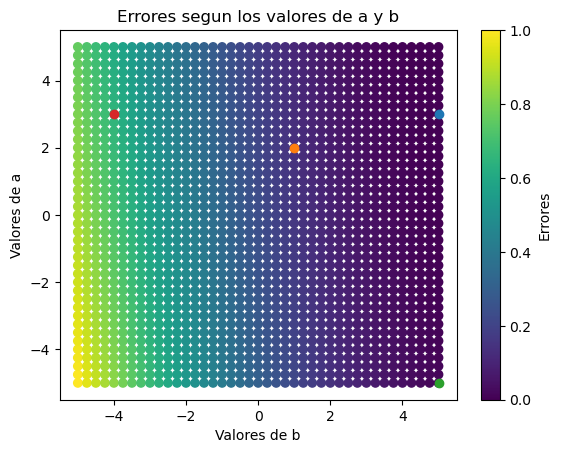

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Generem seqüència de valors amb una separació entre ells de 0.25 unitats
valores_a = np.arange(-5,5.25,0.25)
valores_b = np.arange(-5,5.25,0.25)

# Creem dues llistes buides
lista_a = []
lista_b=[]

# Fem un bucle 
iteraciones=0
errores = []
for element_a in valores_a:
    for element_b in valores_b:
        error = get_error(element_a, element_b,x,y0) #utilitzem funció de l'apartat P1
        lista_a.append(element_a) #ho afegim a la llista a
        lista_b.append(element_b)
        iteraciones = iteraciones + 1  #per contar quantes evaluacions de la funció de cost s'han hagut de fer per estimar l'error corresponent al valor dels diferents'a i b
        errores.append(error)
        
print (iteraciones)

#Generem gràfic de l'error de cada parella d'a i b
plt.scatter(lista_a,lista_b,c=errores,)
plt.scatter(a0,b0)
plt.scatter(1,2) #a1 i b1 del P2
plt.scatter(5,-5) #a3 i b3 del P2
plt.scatter(-4,3) #a2 i b2 del P2
plt.colorbar(label='Errores') #Creem barra de color per poder saber el valor de l'error corresponent a 'a' i 'b'

# Li donem nom als eixos i afegim títol al plot
plt.xlabel('Valores de b')
plt.ylabel('Valores de a')
plt.title('Errores segun los valores de a y b')

# Veiem que el punt vermell que correspon a les coordenades (-4,3) es situa sobre la gama verda de colors q correspon a l'error més gran 
# de les diferents coordenades del P2. Per altra banda, el punt blau i el verd corresponen a un error de 0 o molt proper a 0 que coincideix
# amb les dades obtingudes en el gràfic de rectes.
        
# El numero d'iteracions es 1681. Fa referència a la quantitat de punts que apareixen en el gràfic.

# 2. Gradient descent

En l'apartat anterior, hem pogut aproximar els valors òptims de $a$ i $b$ fent una exploració exhaustiva de l'espai de paràmetres en una regió concreta. En general, això no és factible, bé perquè no coneixem la regió a explorar, i/o perquè hi ha molts paràmetres, per la qual cosa és impossible fer una exploració exhaustiva. En aquests casos, és útil utilitzar algorismes d'optimització que ens ajudin a trobar solucions òptimes d'una manera més eficaç.

Aquí implementarem l'algorisme "gradient descent", que utilitza el gradient de la funció de cost per, iterativament, obtenir paràmetres que millor s'acosten a l'òptim (mínim de la funció de cost $E$). A cada iteració  $t$, aquest algorisme modifica el valor de cada paràmetre $p$ segons:

\begin{align}
p(t+1)=p(t)+\alpha \partial E/\partial p(t) \tag{1}
\end{align}

on $\alpha$ és la "learning rate" de l'algorisme, i $\partial E/\partial p(t)$ denota la derivada de la funció de cost respecte el paràmetre $p$.


Algorisme gradient descent:

```
1. Inicialització:

Definició dels valors inicials de a i b. Definició d' un valor d' alpha (learning rate), de la tolerància epsilon per a determinar convergència i el nombre màxim d'iteracions.

2. Fins que el cost sigui menor a epsilon i no s'arribi al nombre màxim d'iteracions:

Modificar els valors de a i b segons l'Eq. 1.
```


```



**P4.** Implementeu l'algorisme de gradient decent per trobar la millor estimació de *a_0* i *b_0*.

**P4.1.** A partir de la funció de MSE, calculeu les derivades parcials de l'error per cada paràmetre (a mà!). 

**P4.2.** Implementeu l'algorisme. Inicialitzeu-lo amb valors aleatoris de $a$ i $b$ en el rang [-500, 500]. Guardeu els valors de la funció de cost a cada iteració per poder visualitzar l'evolució del valor al llarg de les iteracions al final de l'execució. 

**P4.3**. Quins valors finals obteniu per $a$ i $b$? Coincideixen amb els valors usats per generar les dades? Observeu la recta corresponent en relació amb les dades. Com és l'ajust? 

**P4.4**. Quantes iteracions heu necessitat per obtenir un bon ajust? 

**P4.5**. Què passa si modifiqueu la condició inicial? Executeu l'algorisme amb 10 valors inicials diferents. 

**P4.6**. Què passa si modifiqueu $\alpha$?



Error final: 7.992738691699292e-28
a estimada: 5.000000000000009
b estimada: 2.99999999999994
a0: 5
b0: 3


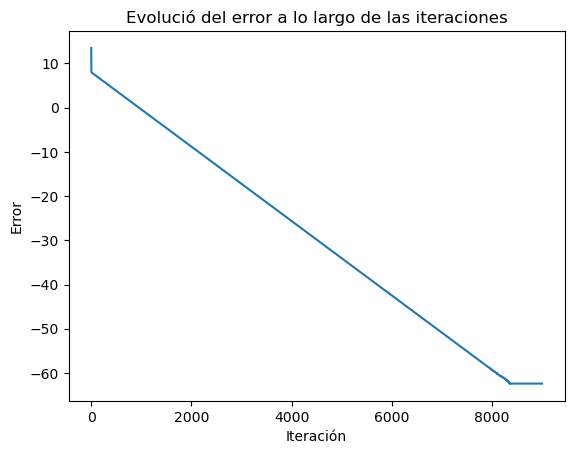

In [6]:
import numpy as np
import math
import random

# Creem sequència amb distribució uniforme
a = np.random.uniform(-500,500)
b = np.random.uniform(-500,500)

# Donem valor al learning rate
alpha = -0.01 #La posem negativa perquè després a la fórmula la posem sumant

i = 0
errores = []
erroreslog=[]
iteraciones = np.arange(0,9000)

# Utilitzem l'algorisme de gradient descent
while i < 9000:
    da = (2/10)*(sum(f_distances(a,b,x,y0)*x))
    db = (2/10)*(sum(f_distances(a,b,x,y0)))
    
    E = get_error(a,b,x,y0)
    Elog = math.log(E)
    errores.append(E)
    erroreslog.append(Elog)
    
    a = a + (alpha*da)
    b = b + (alpha*db)
    i = i+1

# Imprimim els valors que volem saber
print(f'Error final: {E}')
print(f'a estimada: {a}')
print(f'b estimada: {b}')
print(f'a0: {a0}')
print(f'b0: {b0}')

# Grafiquem la recta corresponent amb les dades
plt.plot(iteraciones,erroreslog)
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Evolució del error a lo largo de las iteraciones')
plt.show()



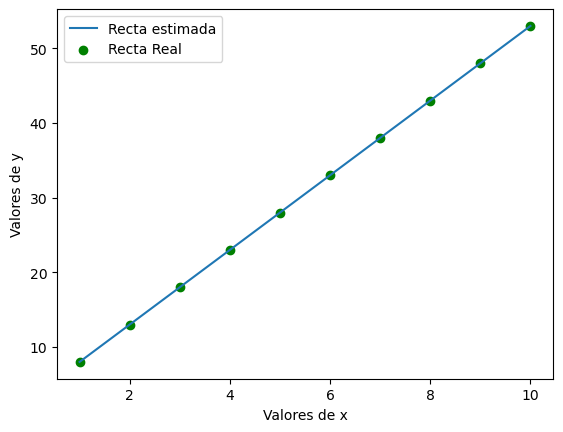

In [7]:
yestimada = a*x+b

plt.plot (x,yestimada,label='Recta estimada')
plt.scatter(x,y0,label = 'Recta Real', color='green')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')    
plt.legend()
plt.show()

In [ ]:
# P4.3: Obtenim un valor de a= 5 i b=2.9999=3, que són els valors pels quals obteníem la recta òptima. 
#       Per tant sí, coincideixen amb els valors usats per generar les dades.  
#       L'ajust com podem veure és molt precís, ja que ens donen qüasi els mateixos valors posats a la recta bona.

# P4.4: 9000

# P4.5: Si canvio la condició inicial i els valors els allunyo molt dels òptims, l'algorisme tardarà molt més a convergir 
#       en el mínim local, és a dir als valors a0 i b0, que si agafo valors molt propers als òptims. 

# P4.6: Si posem un learning rate molt petit pot ser que l'algorisme vagi molt lent (hi haurà moltes iteracions)
#       En canvi si l'augmentem molt, l'algorisme osci·la molt.